Intially left blank. Start presentation from this slide.

# Data Analysis in Python

This presentation will go over basic data analysis in python. We will cover:

1) Reading in and manipulating data with pandas. 

2) Plotting data.

3) Running statistical tests. 



## But first what are all these weirdly named stuff???

<img src="https://pic1.zhimg.com/v2-297731bd359ebc14978967a92f1716cb_r.jpg?source=1940ef5c" width="1000" align="left"/>


## Python modules

Python has **loads** of module avaiable. There are modules for data analysis, plotting, reading in files, machine learning, neuroimaging... 

BUt what is a module? A module contain pre-written code, functions, classes etc that we can use in our code. 

Some come with vanilla python while others have to be installed either from github or via the pip system (this is beyond this talk)

## How to import Modules and Access Functions

Modules are imported (usually at the top of the script) as

```import module ```

Modules can also be renamed when imported (useful to abbreviate long module names).

```import module as mod```

Code from the module is accessed using the name of modules followed by a ```.``` then the function's name.

```mod.examplefunction()```

In [2]:
import pandas as pd

#This is another way to import functions/classes. It imports what you asked and not the whole module. Saves resources etc 
from numpy.random import default_rng 

#Random number generator
rng = default_rng() #This is a bit complicated so ignore it for the mean time
vals = rng.standard_normal(100)
more_vals = rng.standard_normal(100)

#Makes a dataframe (more on this later)
df = pd.DataFrame([vals, more_vals]).T
print(df)

           0         1
0  -0.914855 -0.754805
1   1.674765  0.048252
2  -1.491083  0.479256
3  -0.426229  1.746128
4  -0.061185 -0.168811
..       ...       ...
95 -1.198765  0.950563
96 -1.686933 -1.356574
97  0.412278  0.461957
98 -0.537801 -0.330817
99 -0.407980 -0.611128

[100 rows x 2 columns]


<img src="https://1.bp.blogspot.com/-BeblIiYBjCM/XvmWKq2vU7I/AAAAAAAAEJI/lqoNiLwjxMUxoBpMIPCONKUkAAiuOrs2QCK4BGAsYHg/w1200-h630-p-k-no-nu/pandas.png" alt="drawing" width="1000" align="right"/>


## Pandas

Pandas is a popular module used to read and manipulate data in a python. It is important to figure out pandas as once the data is in the correct format everything else is loads easier!

The basis of pandas is the dataframe (basically a complicated dictionary made simple) made of rows and columns. 

A dataframe can consist of multiple data types though pandas (confusingly) calls them differently.

## Reading in Data

Pandas can handle multiple types of file intputs from excel spreadsheets to csvs and sql databases. 

The most common way is to read in a file such as csv using the ```pd.read_csv()```. This reads in a csv file and makes it into a pandas dataframe.

In [3]:
df = pd.read_csv('my_csv.csv', index_col='Unnamed: 0')# ignore the index_col bit just a mistake in the csv file 

## Manipulating data

Once the data is read in and assinged to a variable pandas has many inbuilt functions to manipulate and view data. 

We can rename columns/rows using ```df.rename()```

We can make new columns using ```df['new_column_name'] = 100```

We can get values of certain rows, columns or individual cells and assign them to a new variable using ```df.loc``` or ```df.iloc``` 

This new manuplated data can be made into a new dataframe and then written out to as an excel/csv document or sql database!!

In [31]:
import numpy as np

# rename columns
df = df.rename(columns={'0':'value_1' , '1': 'value_2'})

# make new columns
df['new_columns'] = 'Some_string'
df['Boolean'] = True

# Selecting the first two coulmns using df.iloc. First index is rows. Second is columns  
first_two_columns = df.iloc[0:, 0:2]

# Selecting the first two rows.
first_two_rows = df.iloc[0:2, 0:]

# Columns/rows can also be mathematically providing they are of compatable data types.

df['sum_of_columns'] = df['value_1'] + df['value_2']

## Viewing and exploring data

There are a variety of ways to view and explore data. 

Like with any variable we could just print it using the ```print()``` function, however depending on the settings of your ide the whole dataframe won't be printed (and with huge dataframes this will quickly be overwhelming!!)

In [21]:
print(df)

     value_1   value_2  new_columns  Boolean  sum_of_columns
0  -0.119643 -0.563245  Some_string     True       -0.682888
1   1.569207 -0.277535  Some_string     True        1.291672
2  -0.077805 -1.395134  Some_string     True       -1.472939
3  -0.920221 -0.711695  Some_string     True       -1.631916
4   0.406154 -0.294094  Some_string     True        0.112060
..       ...       ...          ...      ...             ...
95 -0.867429 -0.769710  Some_string     True       -1.637139
96 -0.372398 -0.832484  Some_string     True       -1.204881
97  1.565516  1.355683  Some_string     True        2.921200
98 -0.718181 -0.483387  Some_string     True       -1.201569
99  0.903636  0.276086  Some_string     True        1.179722

[100 rows x 5 columns]


A more clearier way is to print out only the top five rows or bottom five rows.

In [22]:
print(df.head(), '\n')
print(df.tail())

    value_1   value_2  new_columns  Boolean  sum_of_columns
0 -0.119643 -0.563245  Some_string     True       -0.682888
1  1.569207 -0.277535  Some_string     True        1.291672
2 -0.077805 -1.395134  Some_string     True       -1.472939
3 -0.920221 -0.711695  Some_string     True       -1.631916
4  0.406154 -0.294094  Some_string     True        0.112060 

     value_1   value_2  new_columns  Boolean  sum_of_columns
95 -0.867429 -0.769710  Some_string     True       -1.637139
96 -0.372398 -0.832484  Some_string     True       -1.204881
97  1.565516  1.355683  Some_string     True        2.921200
98 -0.718181 -0.483387  Some_string     True       -1.201569
99  0.903636  0.276086  Some_string     True        1.179722


We can also explore the datatypes of each column, the summary statistics of the dataframe and the column names.

In [23]:
print(df.describe(), '\n')
print(df.columns, '\n')
print(df.dtypes, '\n')

          value_1     value_2  sum_of_columns
count  100.000000  100.000000      100.000000
mean     0.050833    0.078548        0.129381
std      0.960960    1.016081        1.335781
min     -2.300920   -1.812766       -3.150778
25%     -0.535519   -0.586774       -0.686167
50%      0.100536    0.033909        0.160384
75%      0.662442    0.803016        1.087914
max      2.205904    2.955150        4.458147 

Index(['value_1', 'value_2', 'new_columns', 'Boolean', 'sum_of_columns'], dtype='object') 

value_1           float64
value_2           float64
new_columns        object
Boolean              bool
sum_of_columns    float64
dtype: object 



Finally (through a process called masking) we can select values based on condition(s). We can then see how many values are in our data that meet that condition. 

Don't worry if this looks complicated (it can be) it is more to show how powerful pandas can be!

In [24]:
print('Number of values over 1 in our data:', len(df['value_1'].loc[df['value_1'] > 1]))

Number of values over 1 in our data: 16


<img src="https://cdn.thinglink.me/api/image/465563090277105665/1024/10/scaletowidth/0/0/1/1/false/true?wait=true" alt="" width="500" align="top"/>


Pandas is a big library with lots of powerful features, classes and functions in it. 

Don't worry if it all seems like a lot because it is! 

But Pandas is initutive once you get the hang of it and has great documentation to help (https://pandas.pydata.org/docs/index.html)

## Plotting

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fclipground.com%2Fimages%2Fgraphing-clipart-17.jpg&f=1&nofb=1" alt="" width="500" align="top"/>


Python has a few different options for plotting depending on what kind of plots we want.

The grandparent of all the plotting libraries is matplotlib as most of the plotting libraries are built on top of matplotlib. However for this presentation we are going to focus on one of matplotlib's offspring **seaborn**

## But first Pandas again!!

Pandas does have basic plotting function. Plotting with pandas is extremely easy but not very customisable. Great for initially exploring data

array([[<AxesSubplot:xlabel='value_1', ylabel='value_1'>,
        <AxesSubplot:xlabel='value_2', ylabel='value_1'>],
       [<AxesSubplot:xlabel='value_1', ylabel='value_2'>,
        <AxesSubplot:xlabel='value_2', ylabel='value_2'>]], dtype=object)

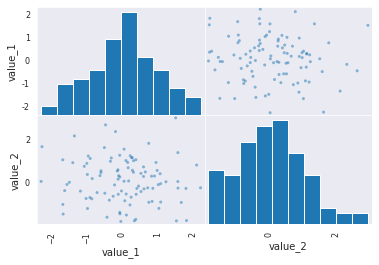

In [25]:
pd.plotting.scatter_matrix(df[['value_1', 'value_2']])

In [6]:
# Ignore this cell, it loads the data 
from BB_data.data_processing.height_weight import main as bmi
from BB_data.data_processing.t1_data import main as t1

bmi_df = bmi()
bmi_t1 = t1('bmi')

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F3840%2F1*ZouWFNqyuFP5dBtqKdiNfA.jpeg&f=1&nofb=1" alt="" width="1000" align="top"/>



<img src="https://onlinelibrary.wiley.com/cms/asset/29893e77-acd0-48c9-93cc-bccb9d582705/hbm25417-fig-0001-m.jpg" alt="" width="500" align="top"/>

Seaborn is a high level plotting library that allows for sophisticated plotting with more customization. 

Over the next few slides we can see some of the plotting functions offered in seaborn from very simple to the more complex.  

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')

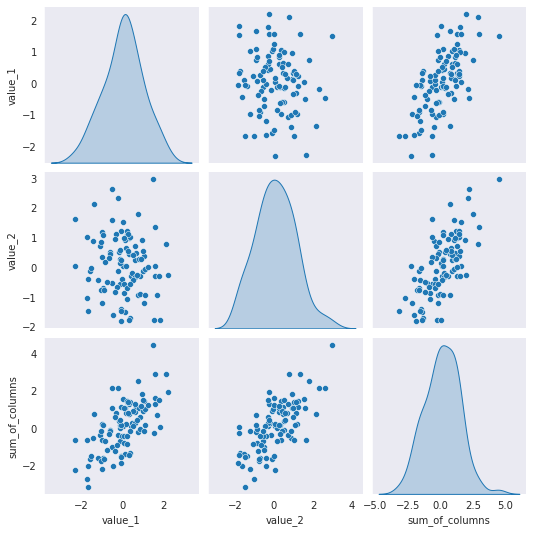

In [28]:
sns.pairplot(df[['value_1', 'value_2', 'sum_of_columns']], diag_kind='kde')

<AxesSubplot:xlabel='value_1', ylabel='sum_of_columns'>

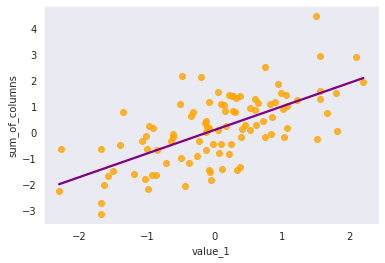

In [47]:
sns.regplot(x='value_1', y='sum_of_columns', data=df, ci=False, 
            line_kws= {"color":"purple"}, scatter_kws={"color":"orange"})

Text(0.5, 1.0, 'BMI at time point 1')

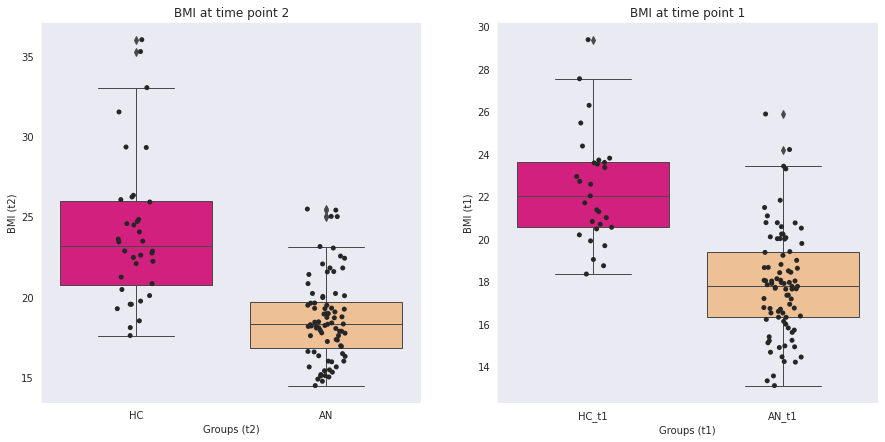

In [29]:
fig,ax = plt.subplots(1,2, figsize=(15,7))
sns.boxplot(x='group', y='bmi', data=bmi_df, ax=ax[0], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="bmi", data=bmi_df, ax=ax[0], color=".15")
ax[0].set(xlabel='Groups (t2)', ylabel='BMI (t2)')
ax[0].set_title('BMI at time point 2')

sns.boxplot(x='group', y='BMI_baseline', data=bmi_t1, ax=ax[1], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="BMI_baseline", data=bmi_t1, ax=ax[1], color=".15")
ax[1].set(xlabel='Groups (t1)', ylabel='BMI (t1)')
ax[1].set_title('BMI at time point 1')

## Maths and Stuff

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.guff.com%2Fsite_2%2Fmedia%2F33000%2F32270%2Fthumbnails%2Fthumbnail_44d5a4f327fba7fbe98b570f.jpg&f=1&nofb=1" alt="" width="500" align="top"/>


Python has a number of packages for statistical analysis. The most common are scipy and statsmodels, though others exist such as pingouin (a wrapper over scipy), scikit learn and tensorflow (more for machine learning/AI)

Scipy is a package that contains mathematical functions for data analysis. It is fast and there is a lot of functions avaiable (particularly for advance maths stuff). More used for when building own functions/models. 

Statsmodels provides a high level api that comes ready to use out of the box. 

In [28]:
import statsmodels.api as sm
import scipy

In [29]:
tscore, pval = scipy.stats.ttest_ind(bmi_t1['BMI_baseline'].dropna(), bmi_df['bmi'].dropna())
print(f'Pval is {pval} and the t score is {tscore}\n')

sm.OLS(df['sum_of_columns'], df[['value_1', 'value_2']] ).fit().summary()

Pval is 0.010100282721064818 and the t score is -2.5940318047788606



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         sum_of_columns   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.089e+32
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                        0.00
Time:                        10:00:44   Log-Likelihood:                          3355.6
No. Observations:                 100   AIC:                                     -6707.
Df Residuals:                      98   BIC:                                     -6702.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
value_1        1.0000   6.85e-17   1.46e+16      0.000       1.000       1.000
value_2        1.0000   6.47e-17   1.55e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.040   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.070
Skew:                           0.041   Prob(JB):                        0.965
Kurtosis:                       2.899   Cond. No.                         1.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## And Finally R in Python?

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcodersera.com%2Fblog%2Fwp-content%2Fuploads%2F2019%2F06%2FFast-Track-Your-R-Programming-LanguageFlipDiary-Blog-990x556-1.jpg&f=1&nofb=1" alt="" width="500" align="top"/>


In [30]:
import rpy2.situation
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

base = rpackages.importr('base')
datasets = rpackages.importr('datasets')
stats = rpackages.importr('stats')

r = robjects.r
mtcars = robjects.packages.data(datasets).fetch('mtcars')['mtcars']
fit = stats.glm('mpg ~ cyl + wt -1', family='Gamma', data=mtcars)
summary = base.summary(fit)
print(summary.rx2('coefficients'))


       Estimate   Std. Error  t value     Pr(>|t|)
cyl 0.003676666 0.0009649056 3.810389 6.412005e-04
wt  0.009645158 0.0018712640 5.154354 1.506505e-05



## The End

We covered a lot today but the main take home points are:

1) There are loads of libaraies available in python to manipulate, visualise and run statistical analysis on data.

2) Pandas is important is get your head around as once data is in the correct format everything else is easier!

3) Pick the right tool/package for the job.